# Visualizing statistical relationships

- Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

- The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions:
- scatterplot() (with kind="scatter"; the default)
- lineplot() (with kind="line")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Relating variables with scatter plots
- The most basic, which should be used when both variables are numeric, is the scatterplot() function.

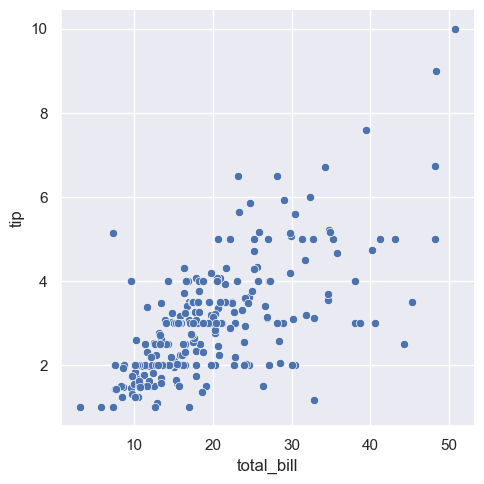

In [3]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

- In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

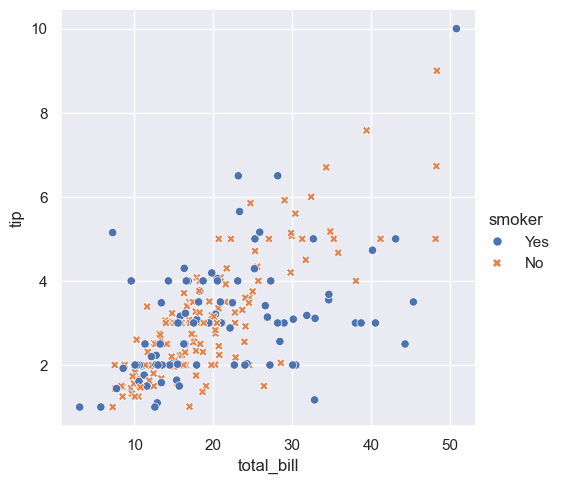

In [5]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker",style="smoker")

- It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

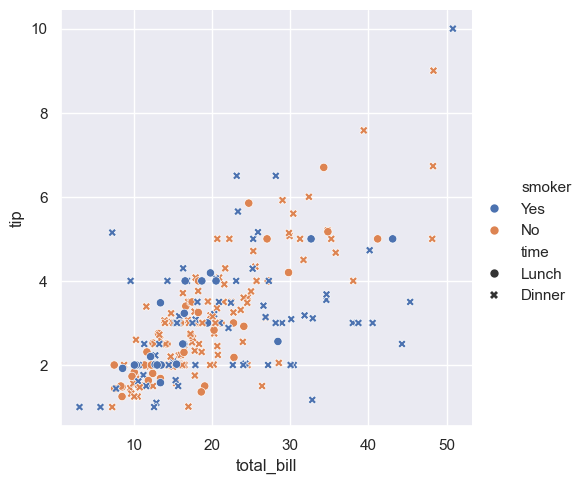

In [6]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

- In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

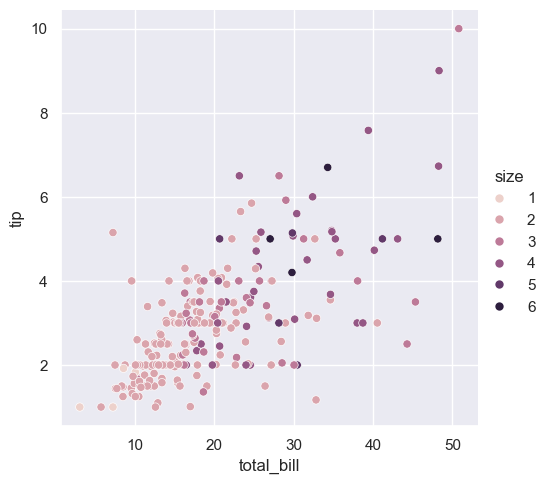

In [7]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

- In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to cubehelix_palette():

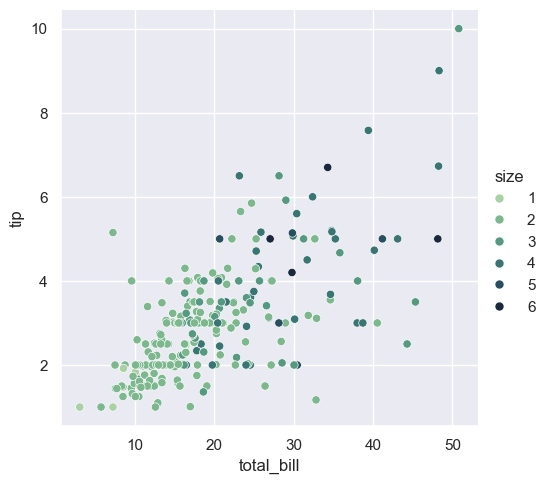

In [8]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

- The third kind of semantic variable changes the size of each point:

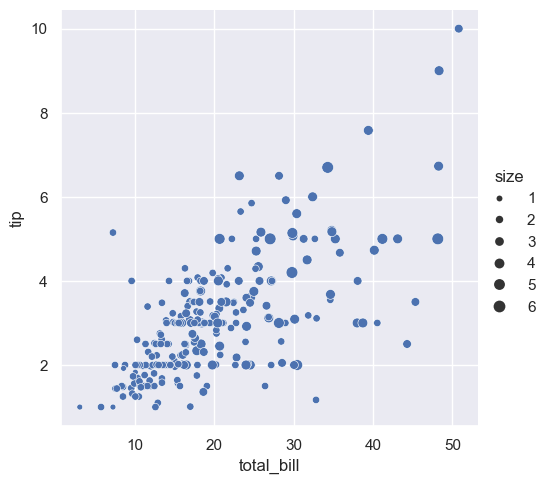

In [9]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

- the range of values in data units is normalized into a range in area units. This range can be customized:

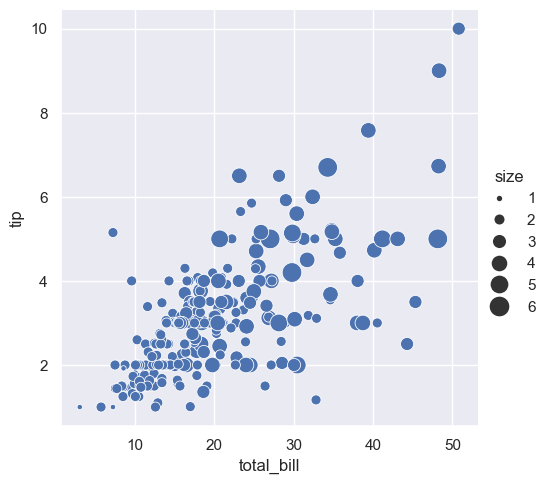

In [10]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

# Emphasizing continuity with line plots

- Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.
- With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":

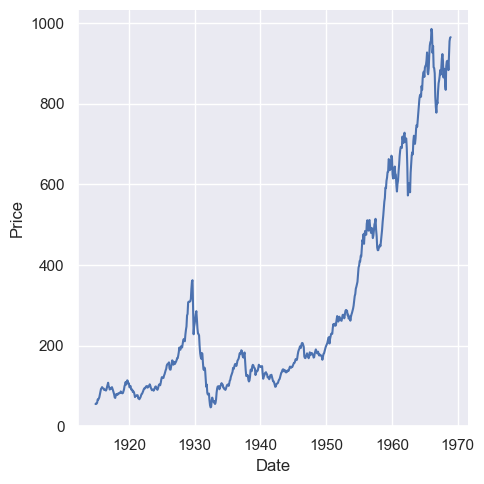

In [11]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

# Aggregation and representing uncertainty
- More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

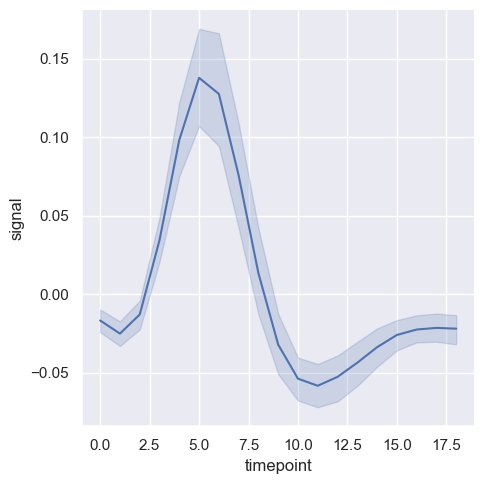

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

- The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

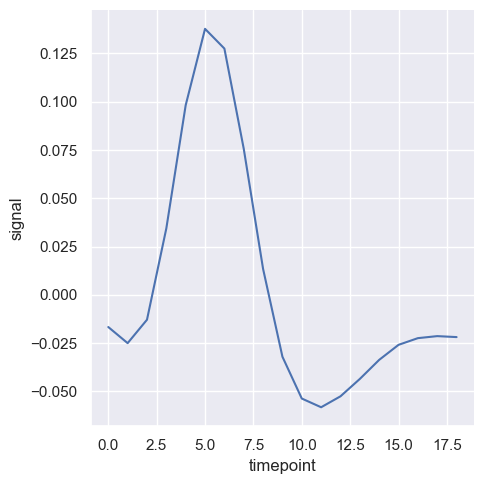

In [13]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

- Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

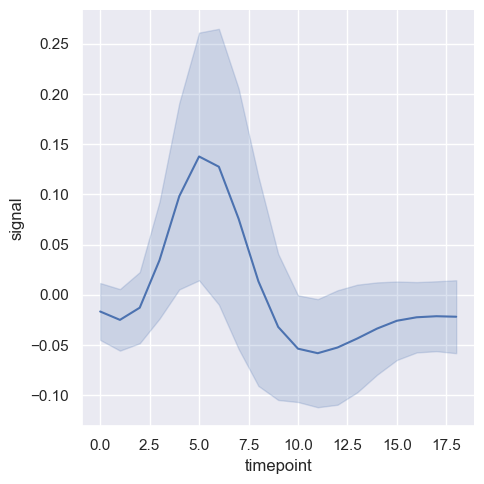

In [14]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

- To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

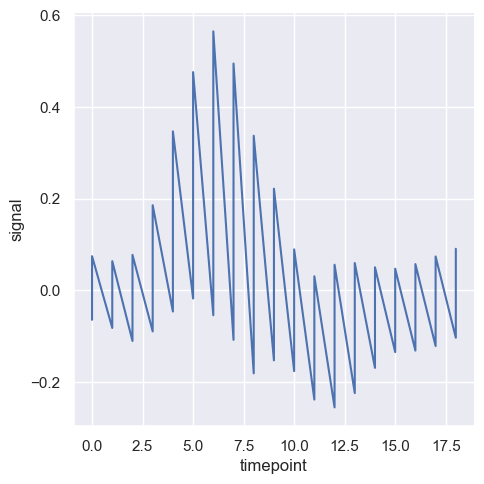

In [17]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

# Plotting subsets of data with semantic mappings
- The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.
- Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

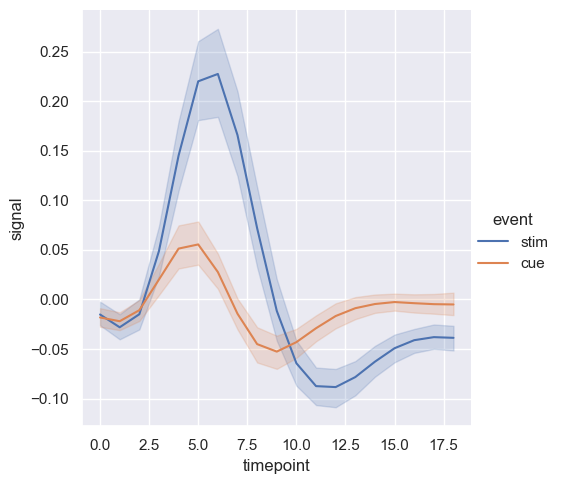

In [18]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

- Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

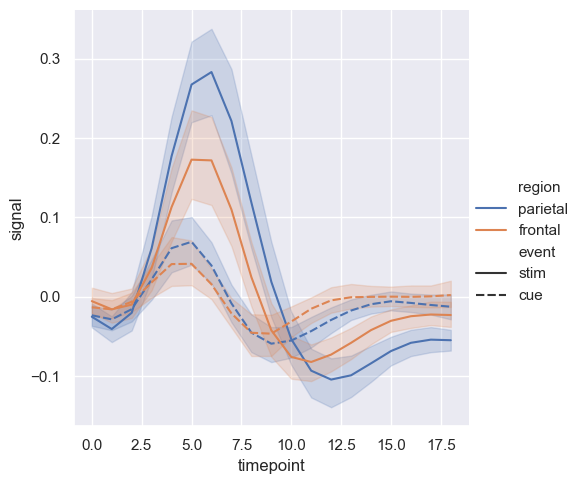

In [19]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

- But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

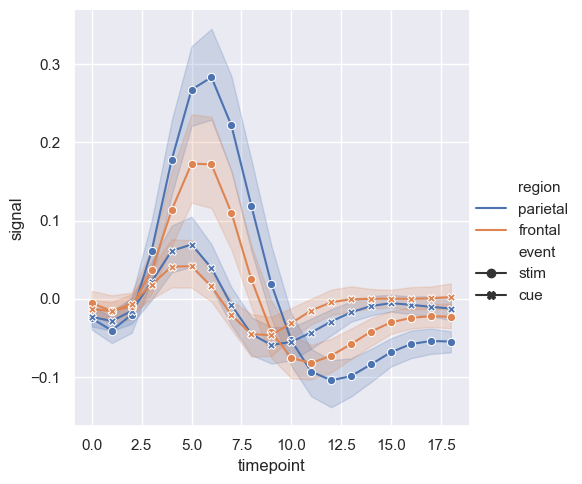

In [20]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

- As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

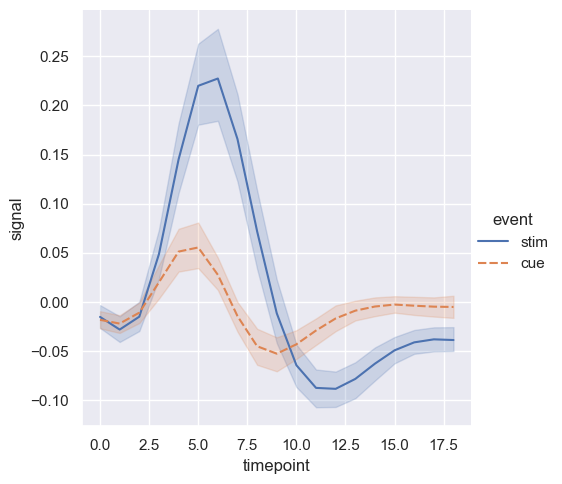

In [21]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

- When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

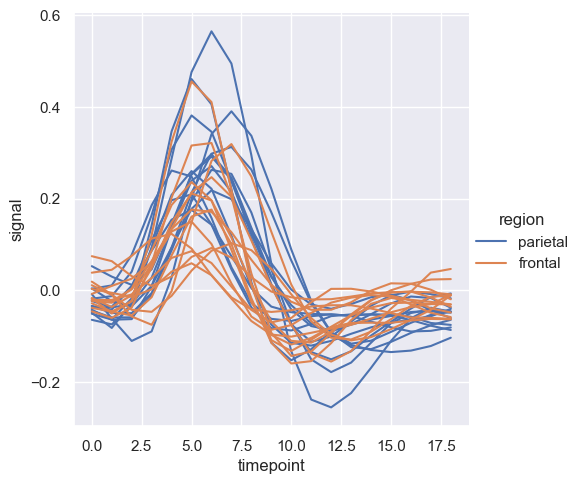

In [23]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

- The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric:

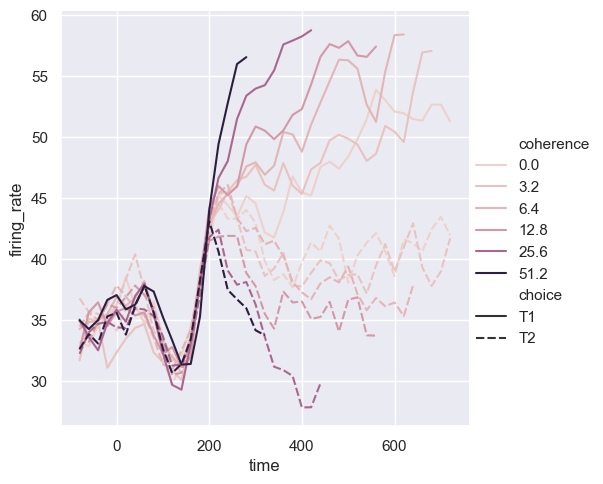

In [24]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

- It may happen that, even though the hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

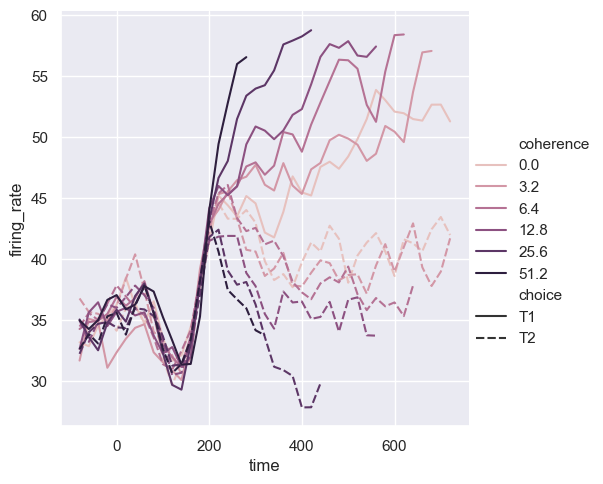

In [25]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

- Or you can alter how the colormap is normalized:

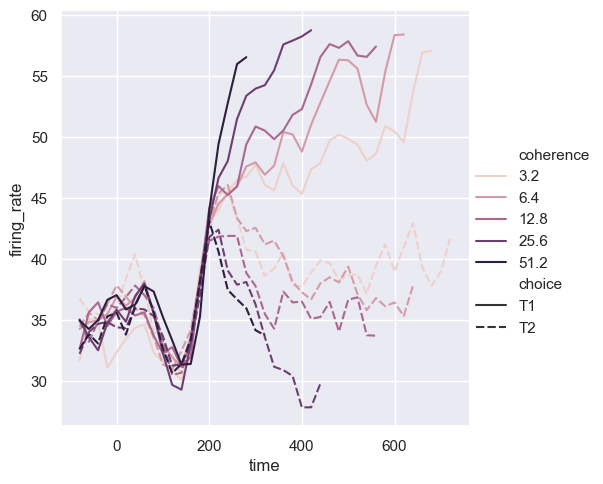

In [26]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

# Controlling sorting and orientation
- Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

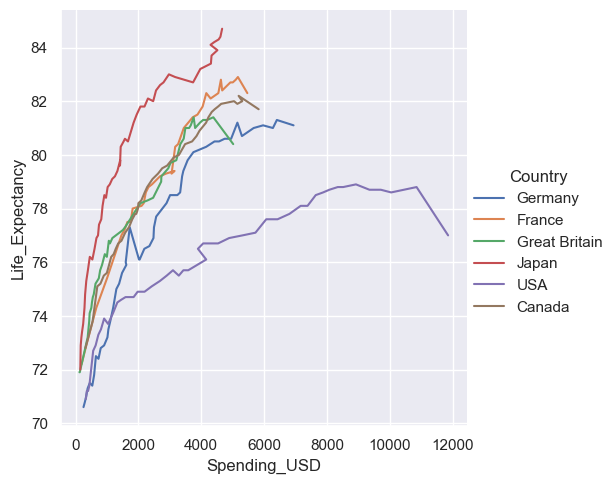

In [27]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

- It’s also possible to sort (and aggregate) along the y axis:

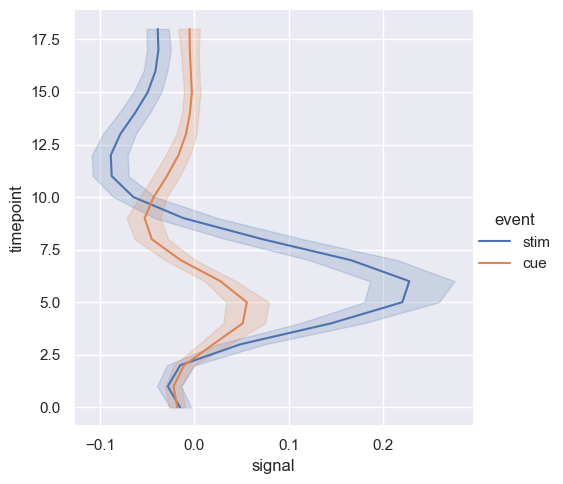

In [28]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)

# Showing multiple relationships with facets
- The best approach may be to make more than one plot. Because relplot() is based on the FacetGrid, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

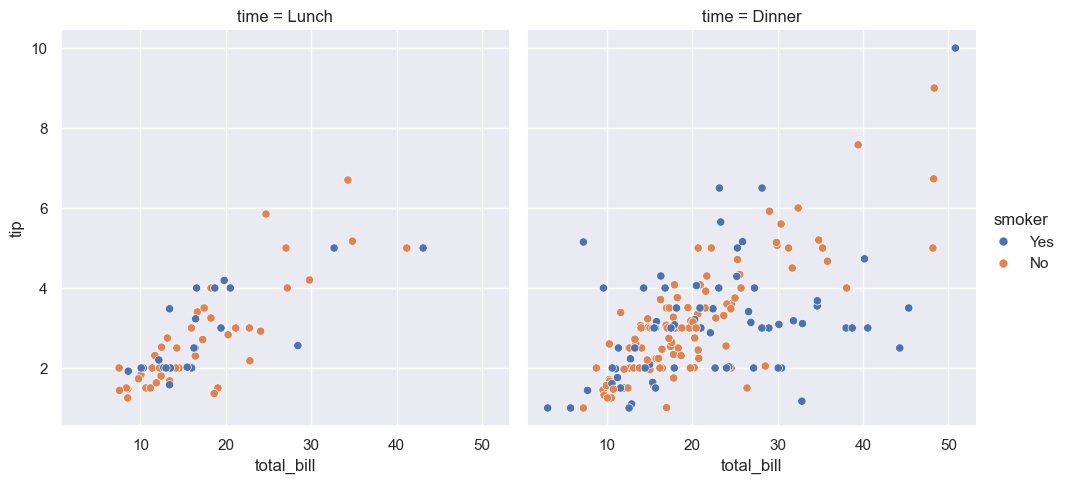

In [29]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

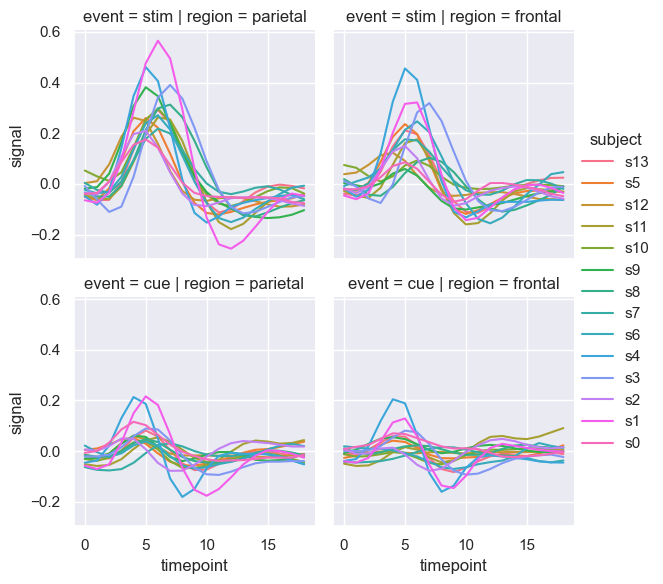

In [30]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

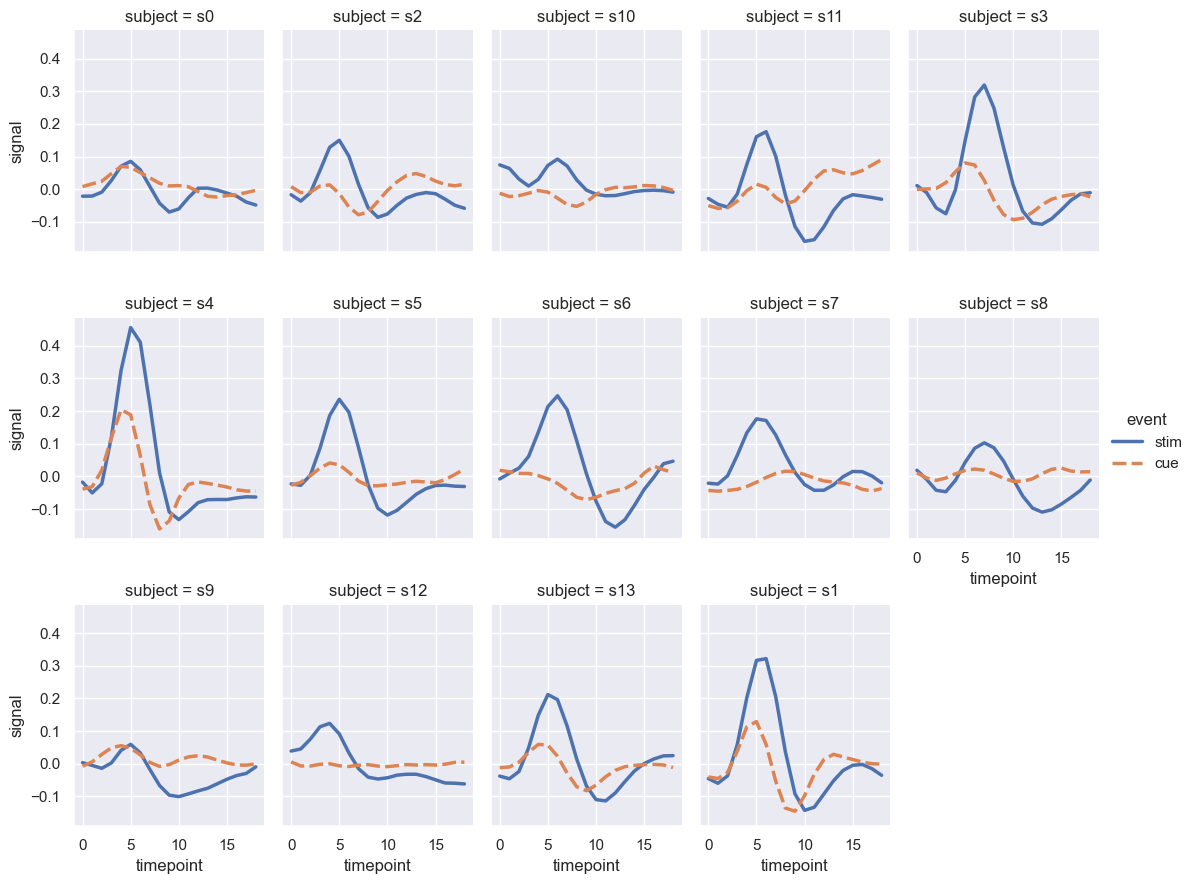

In [31]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)